In [10]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [11]:
crop_factors = pd.read_csv("cropproductiononvariousfactors.csv")

crop_factors

,Rainfall,Temperature,Ph,Crop,Production,Cropconversion
0,400.15082,20.0,3.0,Bajra,0.00690,Bajra
1,400.16331,20.0,3.2,Bajra,0.00747,Bajra
2,400.16387,20.0,3.2,Bajra,0.00749,Bajra
3,400.17967,20.0,3.2,Bajra,0.00822,Bajra
4,400.19582,20.0,3.2,Bajra,0.00895,Bajra
...,...,...,...,...,...,...
189227,766.92202,23.0,6.0,Wheat,10.40000,Wheat
189228,770.28486,27.0,6.0,Wheat,10.40000,Wheat
189229,770.00000,26.0,6.1,Wheat,10.40000,Wheat
189230,633.83459,22.0,6.2,Wheat,10.40000,Wheat


In [12]:
crop_group=crop_factors.groupby(['Crop'],as_index=False).mean()
crop_group.head()

,Crop,Rainfall,Temperature,Ph,Production
0,Bajra,425.977082,25.191432,5.119969,1.186350
1,Banana,573.002379,23.780942,7.576813,26.933297
2,Barley,943.183888,22.044125,6.258317,1.836796
3,Bean,410.527670,22.450000,5.870000,1.340000
4,Black pepper,2116.095894,25.163224,5.923760,1.189527


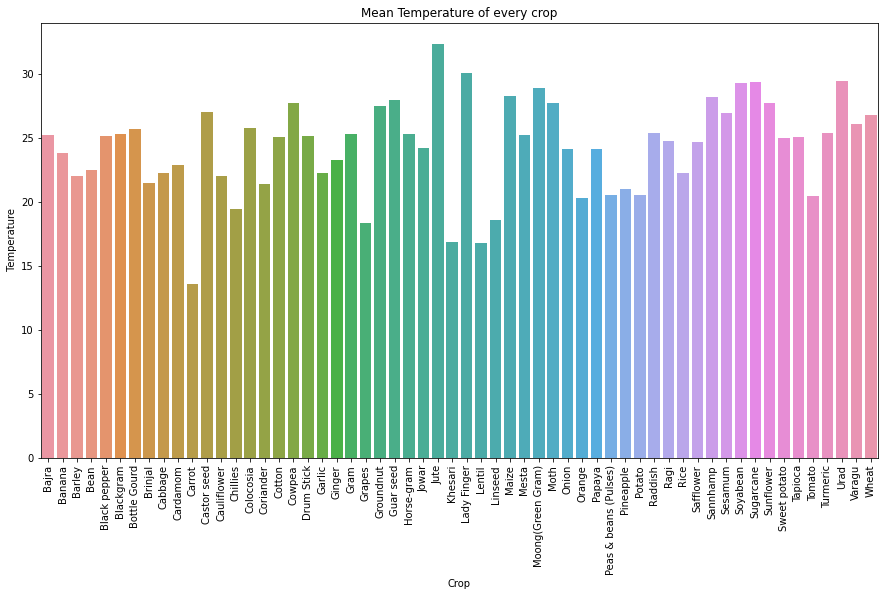

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x='Crop',y='Temperature',data=crop_group)
plt.xlabel("Crop")
plt.title("Mean Temperature of every crop")
plt.ylabel(" Temperature")
plt.xticks(rotation=90)
plt.show()

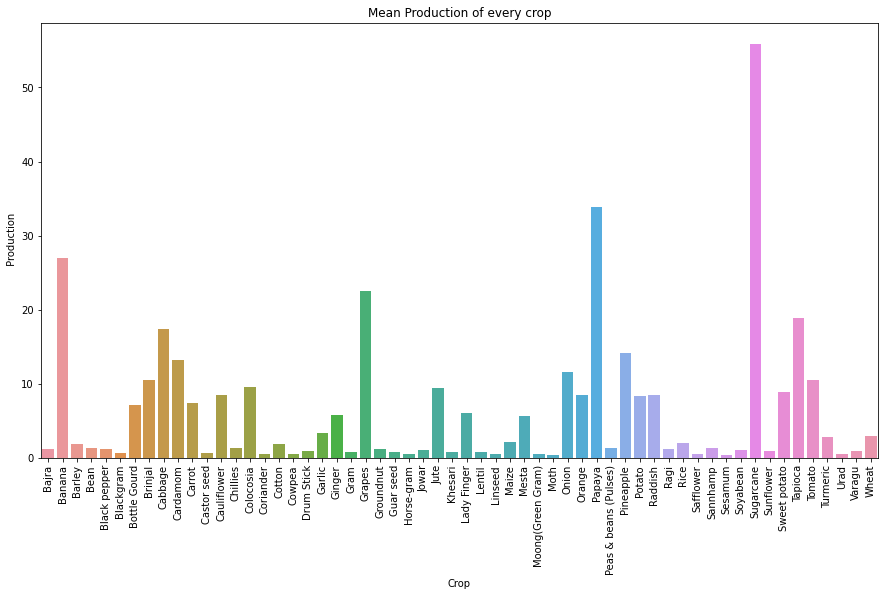

In [14]:
plt.figure(figsize=(15,8))
sns.barplot(x='Crop',y='Production',data=crop_group)
plt.xlabel("Crop")
plt.title("Mean Production of every crop")
plt.ylabel(" Production")
plt.xticks(rotation=90)
plt.show()

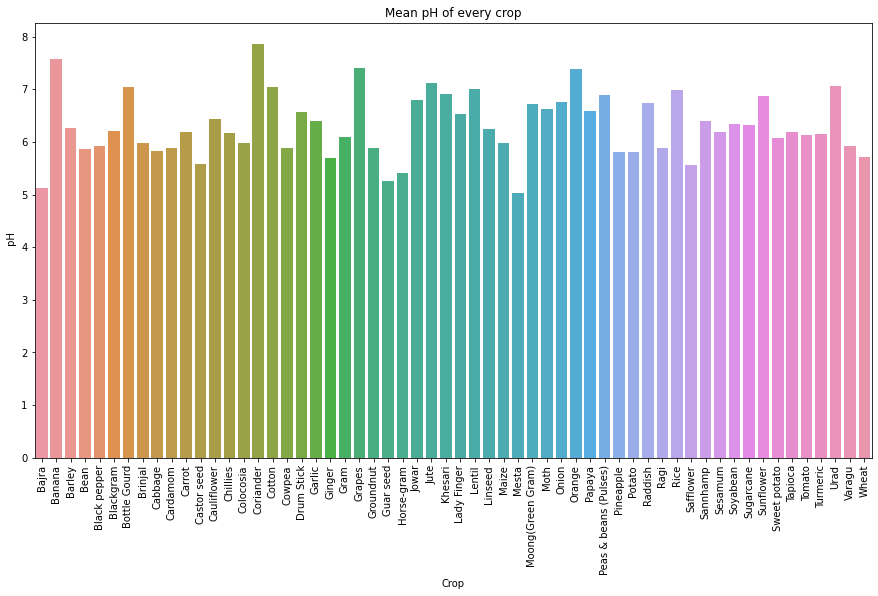

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x='Crop',y='Ph',data=crop_group)
plt.xlabel("Crop")
plt.title("Mean pH of every crop")
plt.ylabel(" pH")
plt.xticks(rotation=90)
plt.show()

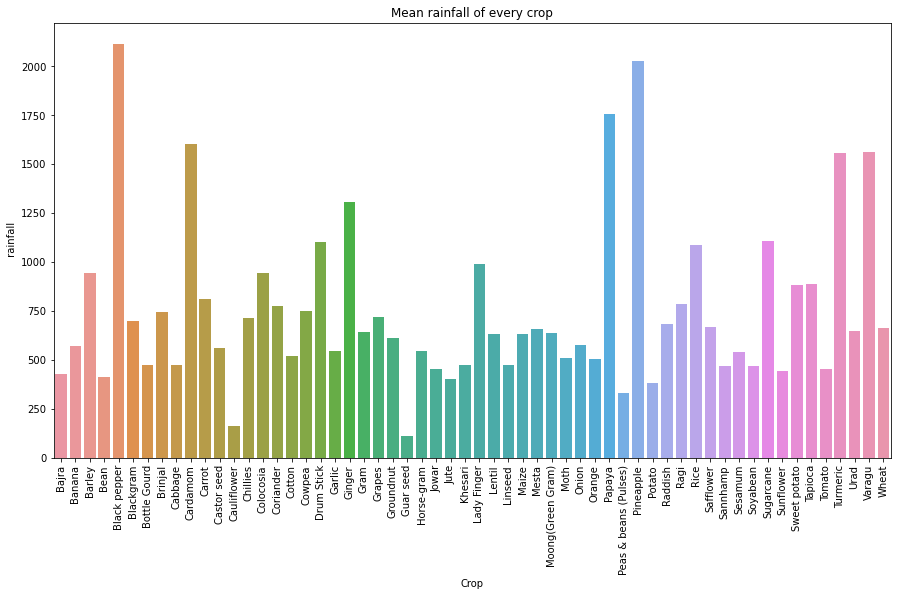

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x='Crop',y='Rainfall',data=crop_group)
plt.xlabel("Crop")
plt.title("Mean rainfall of every crop")
plt.ylabel(" rainfall")
plt.xticks(rotation=90)
plt.show()

In [17]:
crop_factors.head()

,Rainfall,Temperature,Ph,Crop,Production,Cropconversion
0,400.15082,20.0,3.0,Bajra,0.00690,Bajra
1,400.16331,20.0,3.2,Bajra,0.00747,Bajra
2,400.16387,20.0,3.2,Bajra,0.00749,Bajra
3,400.17967,20.0,3.2,Bajra,0.00822,Bajra
4,400.19582,20.0,3.2,Bajra,0.00895,Bajra


In [18]:
#drop crop conversion columns
crop_factors.drop(['Cropconversion'],axis=1,inplace=True)

In [19]:
crop_factors.head()


,Rainfall,Temperature,Ph,Crop,Production
0,400.15082,20.0,3.0,Bajra,0.00690
1,400.16331,20.0,3.2,Bajra,0.00747
2,400.16387,20.0,3.2,Bajra,0.00749
3,400.17967,20.0,3.2,Bajra,0.00822
4,400.19582,20.0,3.2,Bajra,0.00895


#### Crop is Categorical features so use Classification Algorithm's for this problem 
**We train model on different - different classification algorithm like RandomForestClassifier,Logistic Regression, Decision Tree**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import LabelEncoder



In [22]:
X= crop_factors.drop(['Crop','Production'],axis=1)
y =crop_factors.Crop

In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,random_state=10)

In [24]:
model=RandomForestClassifier()

In [25]:
model.fit(X_train,y_train)


RandomForestClassifier()

In [26]:
rf =model.score(X_test,y_test)
rf

0.9982561826252377

In [27]:
model_lr = LogisticRegression().fit(X_train,y_train)
lr =model_lr.score(X_test,y_test)

In [28]:
model_dt = DecisionTreeClassifier().fit(X_train,y_train)
dt =model_dt.score(X_test,y_test)

In [29]:
data ={'Algorithm':['Random Forest ','Logistic Regression','Decision Tree'],
      'Score':[rf,lr,dt],
      }
df =pd.DataFrame(data)
df

,Algorithm,Score
0,Random Forest,0.998256
1,Logistic Regression,0.158793
2,Decision Tree,0.997675


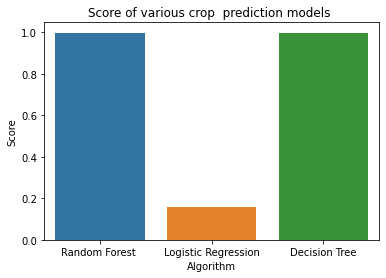

In [30]:
sns.barplot(x=df['Algorithm'],y=df['Score'])
plt.title("Score of various crop  prediction models ")
plt.show()

**Confusion Matrix for Actual and Predicated value**

In [38]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test[:100]) 

In [39]:
cm = confusion_matrix(y_test[:100],y_pred)
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 3]], dtype=int64)

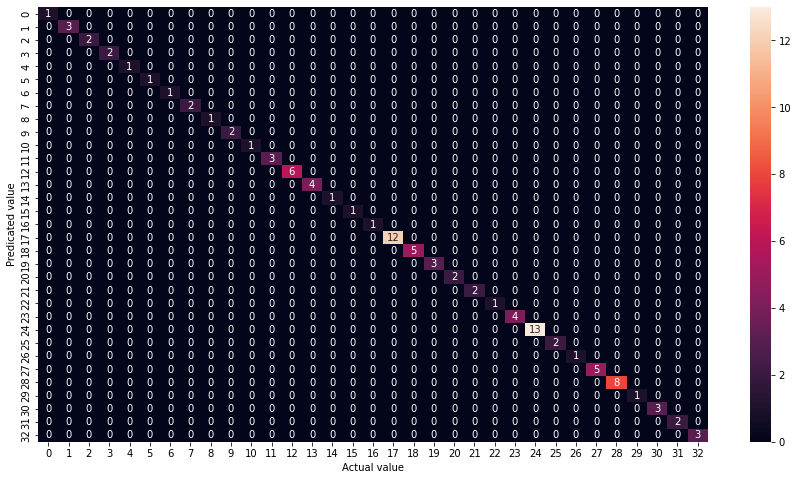

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual value")
plt.ylabel("Predicated value")
plt.show()

In [21]:
import pickle
filename = 'crop_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [22]:
X_test.iloc[0]

Rainfall       654.48113
Temperature     24.69517
Ph               6.00000
Name: 80294, dtype: float64

In [23]:
y_test.iloc[0]

'Maize'

In [25]:
Rainfall = input("Enter Rainfall ")
Temp = input("Enter Temperature ")
ph = input("Enter ph ")

Enter Rainfall 645
Enter Temperature 25
Enter ph 6


In [26]:
crop_model= pickle.load(open("crop_model.pkl","rb"))
data = np.array([Rainfall,Temp,ph])
crop =crop_model.predict(data.reshape(1,-1))
crop

array(['Maize'], dtype=object)